<h1>Do It Yourself Python Series by Kishore - Linear Regression Basics</h1>
<h2>Lab #4 using Notebook feature in Azure Data Studio</h2>
<a href="https://docs.microsoft.com/en-us/sql/azure-data-studio">Get Azure Data Studio here</a> <b>It's Free!</b>
<p>
In this lab, we will be connecting to SQL Server using pyodbc module


<h2>Import Python Modules</h2>

In [2]:
import pyodbc           # python odbc
import pandas as pd     # for dataframe
import numpy as np 

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

%matplotlib inline

<h2>Define SQL Server ODBC Connectioin string</h2>

In [3]:
conn_str = ('server=WIN-EEL3AK31AJF;database=PizzapyDB;TRUSTED_CONNECTION=yes')

<h2>Connect to SQL Server using ODBC Driver for SQL Server</h2>

In [4]:
conn = pyodbc.connect(r'DRIVER={ODBC Driver 13 for SQL Server};' + conn_str)

<h2>Get data from the Table</h2>

In [5]:
sql = "SELECT * FROM [PizzapyDB].[dbo].[Order1]  WHERE OrderHr BETWEEN 8 and 20"  # Orders between 8AM till 8PM.
df = pd.read_sql(sql,conn)
#print(df)

<h2>Quick check of data distribution</h2>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E73C20F98>,
      dtype=object)

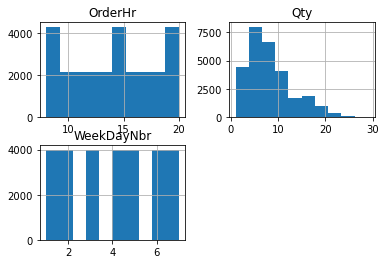

In [6]:
df.hist()

<h2>Quick check for sample data from the Data Frame.</h2>

In [7]:
df.head()

,OrderDt,WeekDayNbr,OrderHr,Qty
0,2018-03-09 14:00:00,6,14,6
1,2019-02-26 14:00:00,3,14,13
2,2016-02-15 14:00:00,2,14,9
3,2019-09-28 09:00:00,7,9,11
4,2015-01-23 16:00:00,6,16,8


<h2>Scatter Chart Visulization. Useful in identifying any outliers.</h2>

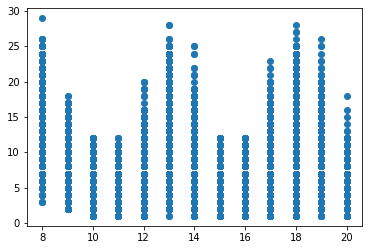

In [8]:
plt.scatter(df['OrderHr'],df['Qty'])

<h2>Scatter Chart Visulization. Useful in identifying any outliers. (WeekDayNbr vs Qty)</h2>

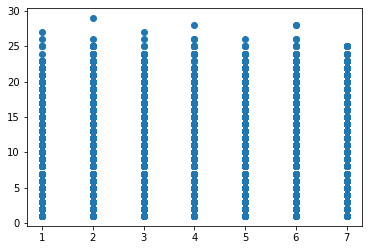

In [110]:
plt.scatter(df['WeekDayNbr'],df['Qty'])

<h2>Apply Linear Regression. Fit and Score by Train Data and Test Data and finilize the Model</h2>

In [13]:
indVar = pd.DataFrame(df['OrderHr'])  # This is the independent variable
depVar = pd.DataFrame(df['Qty'])      # This is the dependent variable

lrModel = LinearRegression()                    # From sklearn

rValues  = []                                    # r-squared values

cvVar   = KFold(n_splits=4, shuffle=False)      # Cross Validation Variable

for i, (trainData, testData) in enumerate(cvVar.split(indVar, depVar)):

    lrModel.fit(indVar.iloc[trainData,:],depVar.iloc[trainData,:])

    score = lrModel.score(indVar.iloc[testData,:], depVar.iloc[testData,:])

    rValues.append(score)

print(rValues)

[0.00940773958098473, 0.011292977410413685, 0.011223426723876218, 0.011931212096219057]


<h2>Predict using the Model</h2>

In [14]:
forList = [[14]]

# try to make prediction for the values in predictionList using the model we had developed earlier i.e. lrModel

predictedValues = lrModel.predict(forList)

print(predictedValues)

[[8.06010427]]
